In [29]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import learning_curve
from matplotlib import pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline

In [3]:
# We are reading the data
df=pd.read_csv('data/alzheimers_disease_data.csv')

In [4]:
#Here we can see no null values in every column
(df.isnull().sum()/len(df)).sort_values(ascending=False)

PatientID                    0.0
BehavioralProblems           0.0
CholesterolLDL               0.0
CholesterolHDL               0.0
CholesterolTriglycerides     0.0
MMSE                         0.0
FunctionalAssessment         0.0
MemoryComplaints             0.0
ADL                          0.0
DiastolicBP                  0.0
Confusion                    0.0
Disorientation               0.0
PersonalityChanges           0.0
DifficultyCompletingTasks    0.0
Forgetfulness                0.0
Diagnosis                    0.0
CholesterolTotal             0.0
SystolicBP                   0.0
Age                          0.0
PhysicalActivity             0.0
Gender                       0.0
Ethnicity                    0.0
EducationLevel               0.0
BMI                          0.0
Smoking                      0.0
AlcoholConsumption           0.0
DietQuality                  0.0
Hypertension                 0.0
SleepQuality                 0.0
FamilyHistoryAlzheimers      0.0
Cardiovasc

In [5]:
df.duplicated().sum()
#no duplicates

np.int64(0)

In [6]:
# We can see that all values are XXXConfid  , which is useless for our analysis, let's drop it
df['DoctorInCharge'].value_counts()

DoctorInCharge
XXXConfid    2149
Name: count, dtype: int64

In [7]:
df = df.drop(columns=['DoctorInCharge'])


In [8]:
df = df.drop(columns=['PatientID'])


In [9]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2149 entries, 0 to 2148
Data columns (total 33 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Age                        2149 non-null   int64  
 1   Gender                     2149 non-null   int64  
 2   Ethnicity                  2149 non-null   int64  
 3   EducationLevel             2149 non-null   int64  
 4   BMI                        2149 non-null   float64
 5   Smoking                    2149 non-null   int64  
 6   AlcoholConsumption         2149 non-null   float64
 7   PhysicalActivity           2149 non-null   float64
 8   DietQuality                2149 non-null   float64
 9   SleepQuality               2149 non-null   float64
 10  FamilyHistoryAlzheimers    2149 non-null   int64  
 11  CardiovascularDisease      2149 non-null   int64  
 12  Diabetes                   2149 non-null   int64  
 13  Depression                 2149 non-null   int64

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,2149.0,74.908795,8.990221,60.000000,67.000000,75.000000,83.000000,90.000000
Gender,2149.0,0.506282,0.500077,0.000000,0.000000,1.000000,1.000000,1.000000
Ethnicity,2149.0,0.697534,0.996128,0.000000,0.000000,0.000000,1.000000,3.000000
EducationLevel,2149.0,1.286645,0.904527,0.000000,1.000000,1.000000,2.000000,3.000000
BMI,2149.0,27.655697,7.217438,15.008851,21.611408,27.823924,33.869778,39.992767
Smoking,2149.0,0.288506,0.453173,0.000000,0.000000,0.000000,1.000000,1.000000
AlcoholConsumption,2149.0,10.039442,5.757910,0.002003,5.139810,9.934412,15.157931,19.989293
PhysicalActivity,2149.0,4.920202,2.857191,0.003616,2.570626,4.766424,7.427899,9.987429
DietQuality,2149.0,4.993138,2.909055,0.009385,2.458455,5.076087,7.558625,9.998346
SleepQuality,2149.0,7.051081,1.763573,4.002629,5.482997,7.115646,8.562521,9.999840


In [11]:
# determine which columns may be categorical based on the number of unique values
for col in df.columns:
    print(col, df[col].nunique())

Age 31
Gender 2
Ethnicity 4
EducationLevel 4
BMI 2149
Smoking 2
AlcoholConsumption 2149
PhysicalActivity 2149
DietQuality 2149
SleepQuality 2149
FamilyHistoryAlzheimers 2
CardiovascularDisease 2
Diabetes 2
Depression 2
HeadInjury 2
Hypertension 2
SystolicBP 90
DiastolicBP 60
CholesterolTotal 2149
CholesterolLDL 2149
CholesterolHDL 2149
CholesterolTriglycerides 2149
MMSE 2149
FunctionalAssessment 2149
MemoryComplaints 2
BehavioralProblems 2
ADL 2149
Confusion 2
Disorientation 2
PersonalityChanges 2
DifficultyCompletingTasks 2
Forgetfulness 2
Diagnosis 2


In [12]:
# Identify numerical columns: those with more than 5 unique values
numerical_cols = [col for col in df.columns if df[col].nunique() > 5]
print("Numerical Columns: ", numerical_cols)

# Identify categorical columns: columns that are not numerical and not 'Diagnosis'
categorical_cols = [col for col in df.columns if col not in numerical_cols and col != 'Diagnosis']
print("Categorical Columns: ", categorical_cols)

Numerical Columns:  ['Age', 'BMI', 'AlcoholConsumption', 'PhysicalActivity', 'DietQuality', 'SleepQuality', 'SystolicBP', 'DiastolicBP', 'CholesterolTotal', 'CholesterolLDL', 'CholesterolHDL', 'CholesterolTriglycerides', 'MMSE', 'FunctionalAssessment', 'ADL']
Categorical Columns:  ['Gender', 'Ethnicity', 'EducationLevel', 'Smoking', 'FamilyHistoryAlzheimers', 'CardiovascularDisease', 'Diabetes', 'Depression', 'HeadInjury', 'Hypertension', 'MemoryComplaints', 'BehavioralProblems', 'Confusion', 'Disorientation', 'PersonalityChanges', 'DifficultyCompletingTasks', 'Forgetfulness']


/var/folders/qh/z2q31mxn1w14dq3q46dj8fnh0000gn/T/ipykernel_39881/4171109919.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Diagnosis', palette=palette, ax=axes[0])


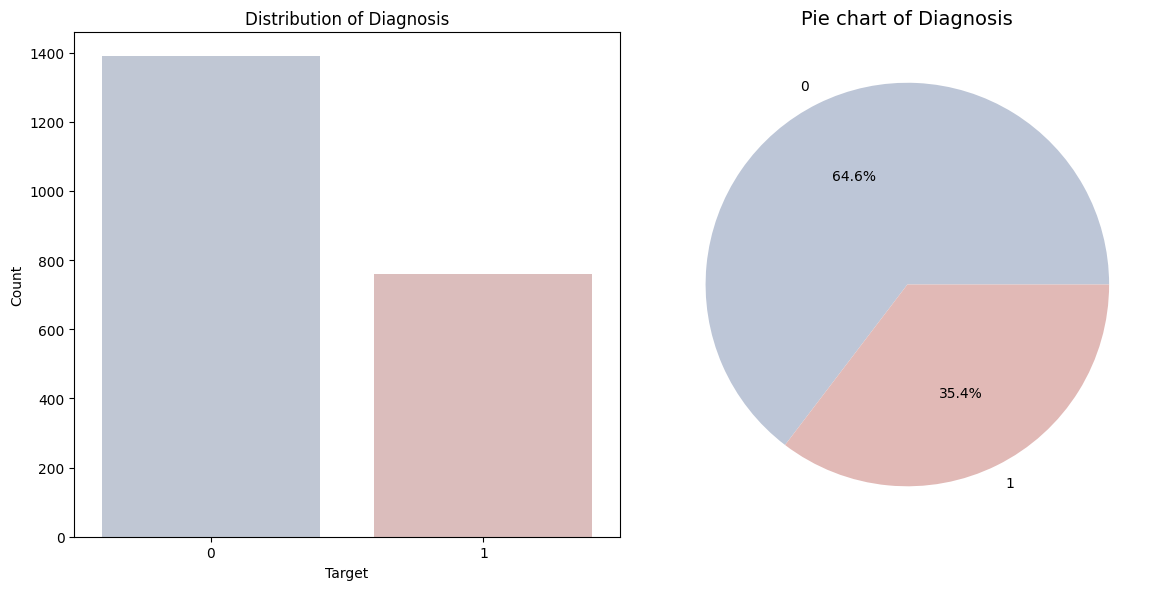

In [13]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
palette = sns.color_palette('vlag',2)

sns.countplot(data=df, x='Diagnosis', palette=palette, ax=axes[0])
axes[0].set_title('Distribution of Diagnosis')
axes[0].set_xlabel('Target')
axes[0].set_ylabel('Count')

df['Diagnosis'].value_counts().plot(kind='pie', autopct='%1.1f%%', ax=axes[1], colors=palette)
axes[1].set_title('Pie chart of Diagnosis', fontsize=14)
axes[1].set_ylabel('')

plt.tight_layout()
plt.show()

/var/folders/qh/z2q31mxn1w14dq3q46dj8fnh0000gn/T/ipykernel_39881/148019917.py:41: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i, 0].set_xticklabels(custom_labels[feature])
/var/folders/qh/z2q31mxn1w14dq3q46dj8fnh0000gn/T/ipykernel_39881/148019917.py:41: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i, 0].set_xticklabels(custom_labels[feature])
/var/folders/qh/z2q31mxn1w14dq3q46dj8fnh0000gn/T/ipykernel_39881/148019917.py:41: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i, 0].set_xticklabels(custom_labels[feature])
/var/folders/qh/z2q31mxn1w14dq3q46dj8fnh0000gn/T/ipykernel_39881/148019917.py:41: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
 

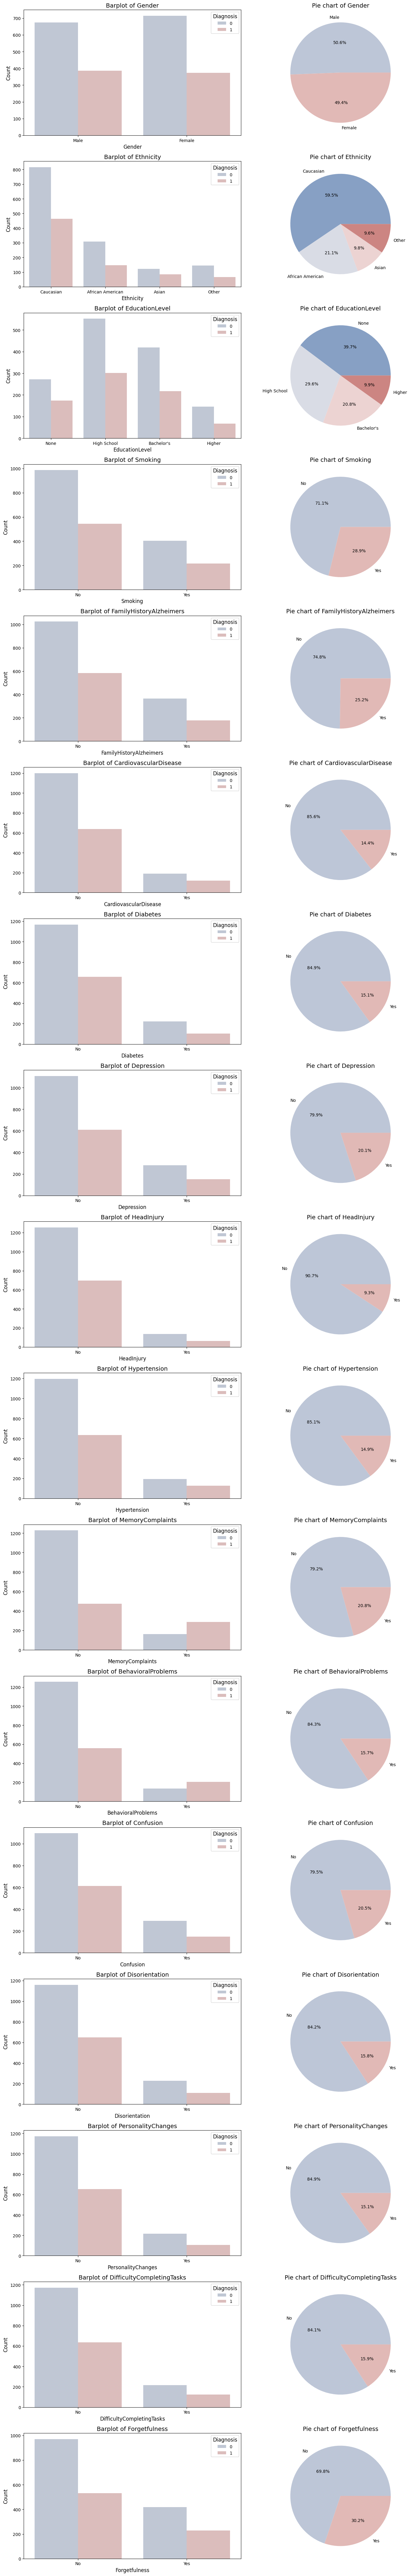

In [14]:
# Custom labels for the categorical columns
custom_labels = {
    'Gender': ['Male', 'Female'],
    'Ethnicity': ['Caucasian', 'African American', 'Asian', 'Other'],
    'EducationLevel': ['None', 'High School', 'Bachelor\'s', 'Higher'],
    'Smoking': ['No', 'Yes'],
    'FamilyHistoryAlzheimers': ['No', 'Yes'],
    'CardiovascularDisease': ['No', 'Yes'],
    'Diabetes': ['No', 'Yes'],
    'Depression': ['No', 'Yes'],
    'HeadInjury': ['No', 'Yes'],
    'Hypertension': ['No', 'Yes'],
    'MemoryComplaints': ['No', 'Yes'],
    'BehavioralProblems': ['No', 'Yes'],
    'Confusion': ['No', 'Yes'],
    'Disorientation': ['No', 'Yes'],
    'PersonalityChanges': ['No', 'Yes'],
    'DifficultyCompletingTasks': ['No', 'Yes'],
    'Forgetfulness': ['No', 'Yes']
}

n_categorical_cols = len(categorical_cols)
# Fixed two-color palette for countplots
countplot_palette = sns.color_palette("vlag", 2)
fig, axes = plt.subplots(n_categorical_cols, 2, figsize=(15, 5*n_categorical_cols))

for i, feature in enumerate(categorical_cols):
    # Determine the number of unique values for the current feature for the pie chart
    n_unique_values = df[feature].nunique()
    # Generate a color palette with a sufficient number of colors
    palette = sns.color_palette("vlag", n_unique_values)

    # Barplots
    sns.countplot(x=feature, hue='Diagnosis', data=df, ax=axes[i, 0], palette=countplot_palette)
    axes[i, 0].set_title(f'Barplot of {feature}', fontsize=14,)
    axes[i, 0].set_xlabel(feature, fontsize=12)
    axes[i, 0].set_ylabel('Count', fontsize=12)
    axes[i, 0].legend(title='Diagnosis', title_fontsize=12)
    # Set custom x-tick labels for countplot
    if feature in custom_labels:
        axes[i, 0].set_xticklabels(custom_labels[feature])

    # Pie charts
    if feature in custom_labels:
        # Map the original data to the custom labels
        mapped_data = df[feature].map({original: label for original, label in zip(df[feature].unique(), custom_labels[feature])})
        # Use the mapped data for the pie chart
        mapped_data.value_counts().plot(kind='pie', autopct='%1.1f%%', ax=axes[i, 1], colors=palette, labels=custom_labels[feature])
    else:
        df[feature].value_counts().plot(kind='pie', autopct='%1.1f%%', ax=axes[i, 1], colors=palette)
    axes[i, 1].set_title(f'Pie chart of {feature}', fontsize=14)
    axes[i, 1].set_ylabel('')

plt.tight_layout()
plt.show()

In [15]:
#Number of values that have more than 5 unique values
numerical_cols=[column for column in df.columns if df[column].nunique()>=5]


In [16]:
def plot_hist_and_box(df:'pd.DataFrame', column:str):

    # Set up the matplotlib figure
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

    # Histogram plot on the left
    sns.histplot(df[column], kde=True, ax=axes[0])
    axes[0].set_title(f'Histogram of {column}')
    axes[0].set_xlabel(column)
    axes[0].set_ylabel('Frequency')

    # Box plot on the right
    sns.boxplot(y=df[column], ax=axes[1])
    axes[1].set_title(f'Boxplot of {column}')
    axes[1].set_ylabel(column)

    # Adjust the layout
    plt.tight_layout()
    plt.show()


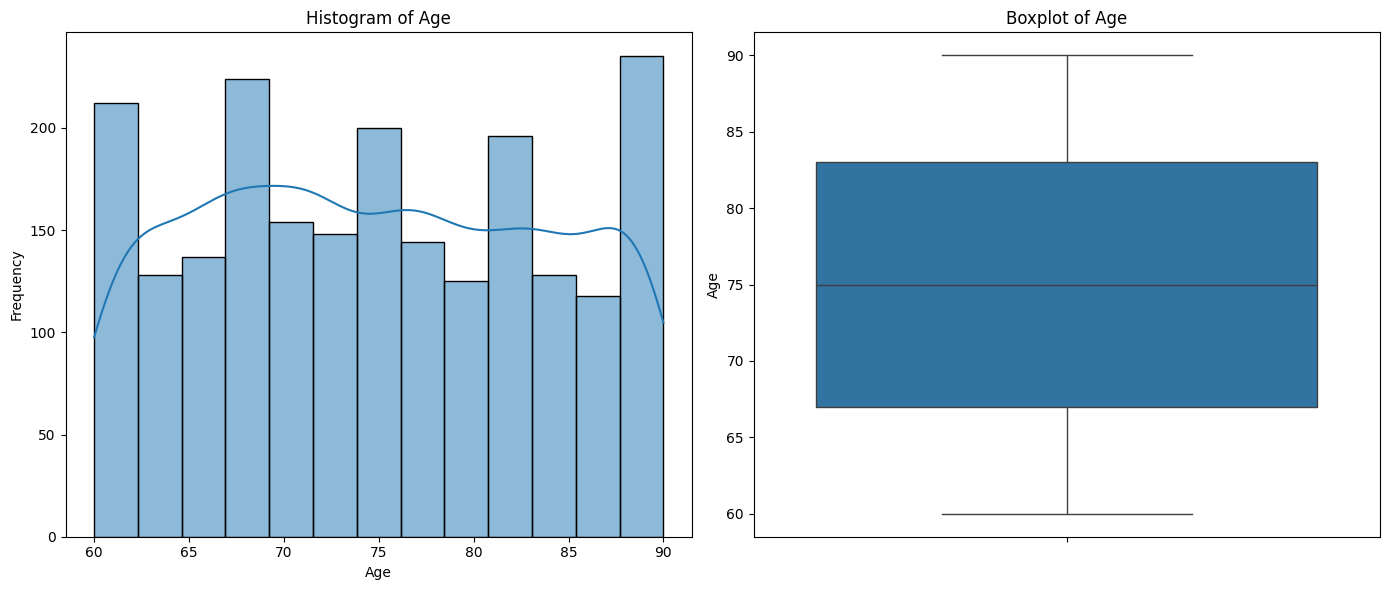

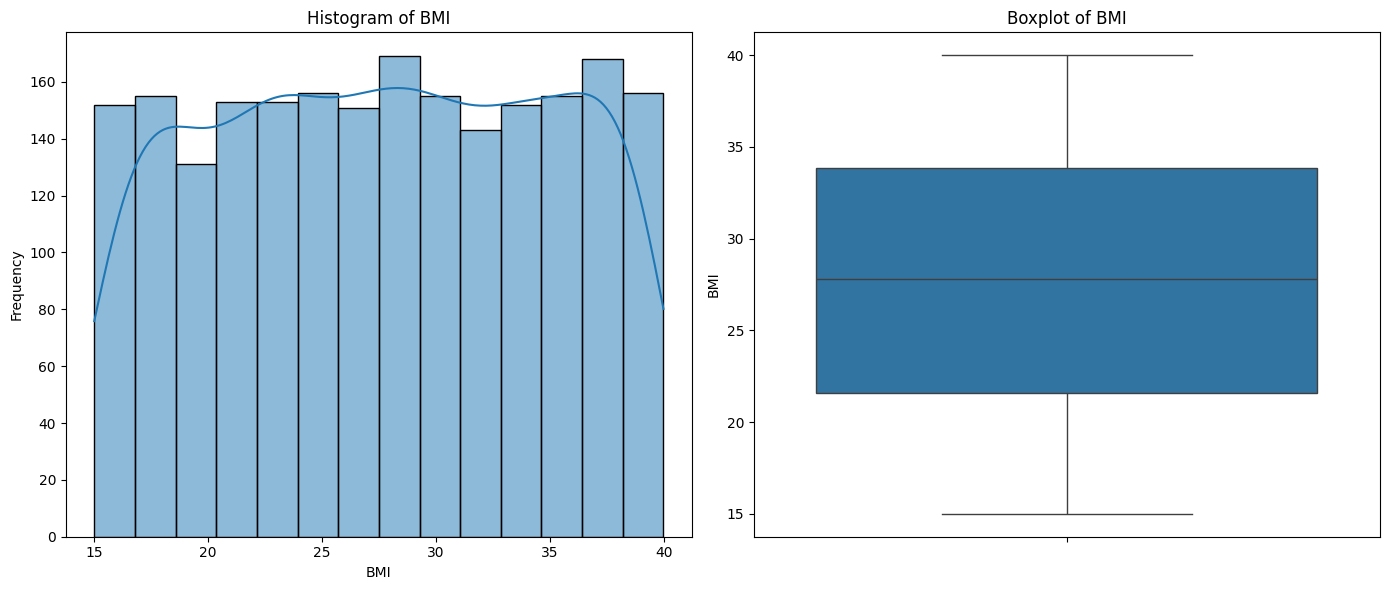

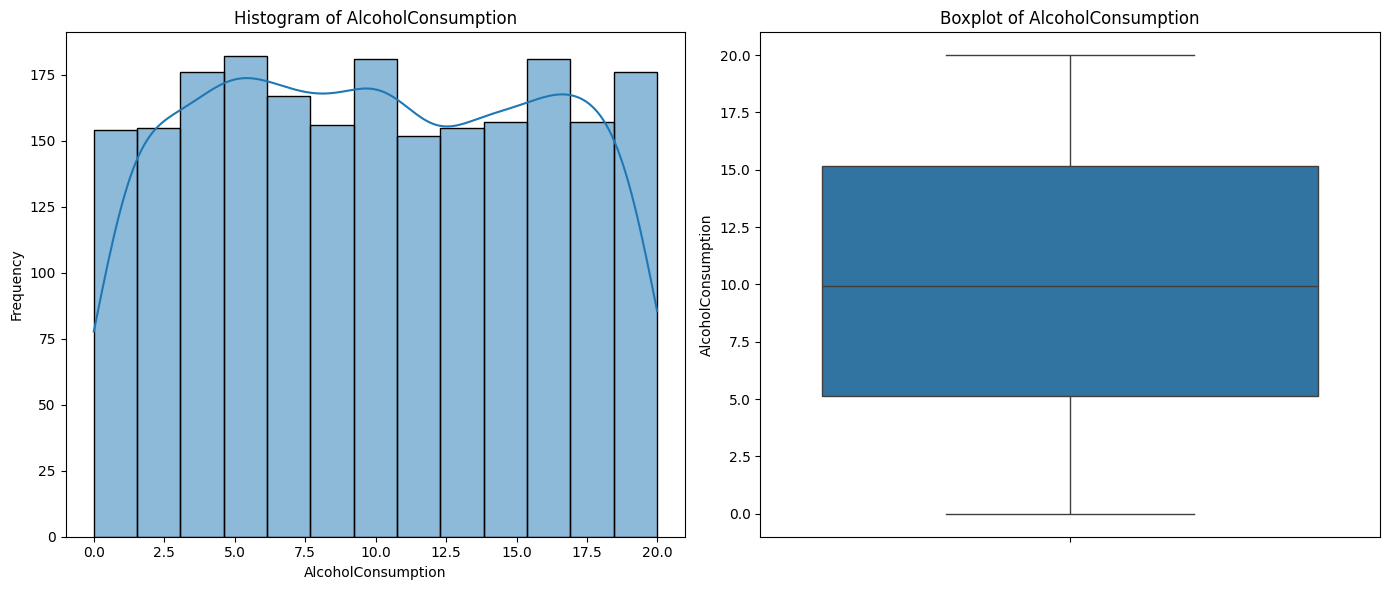

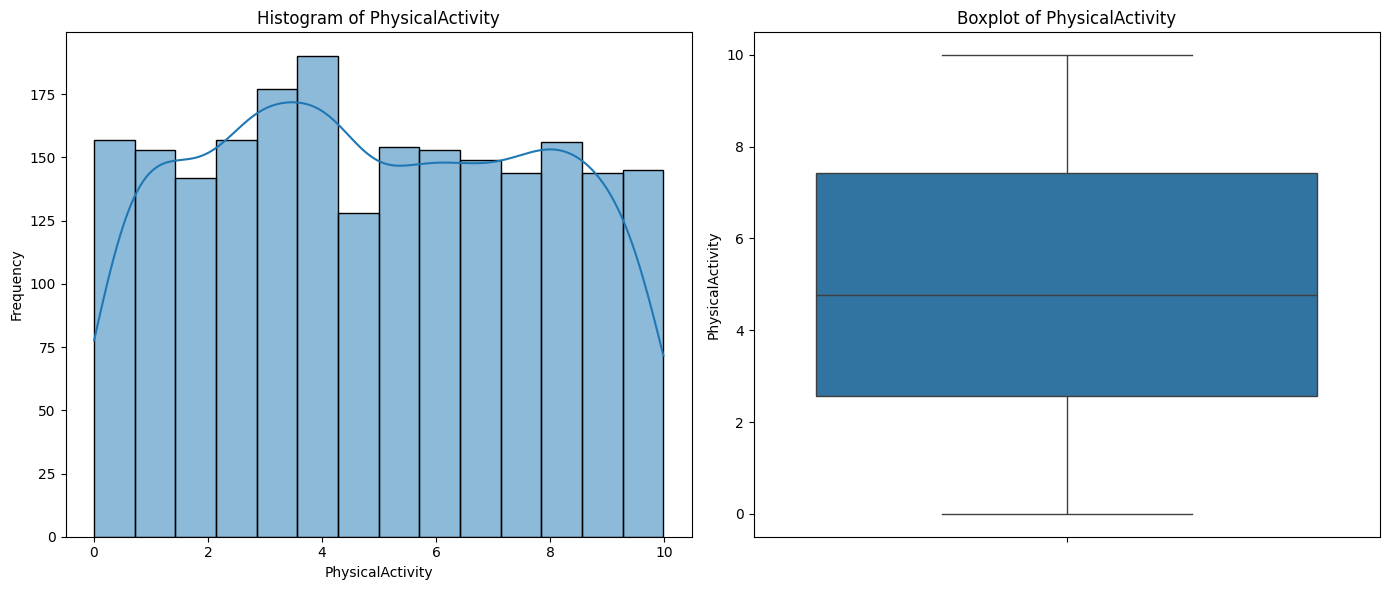

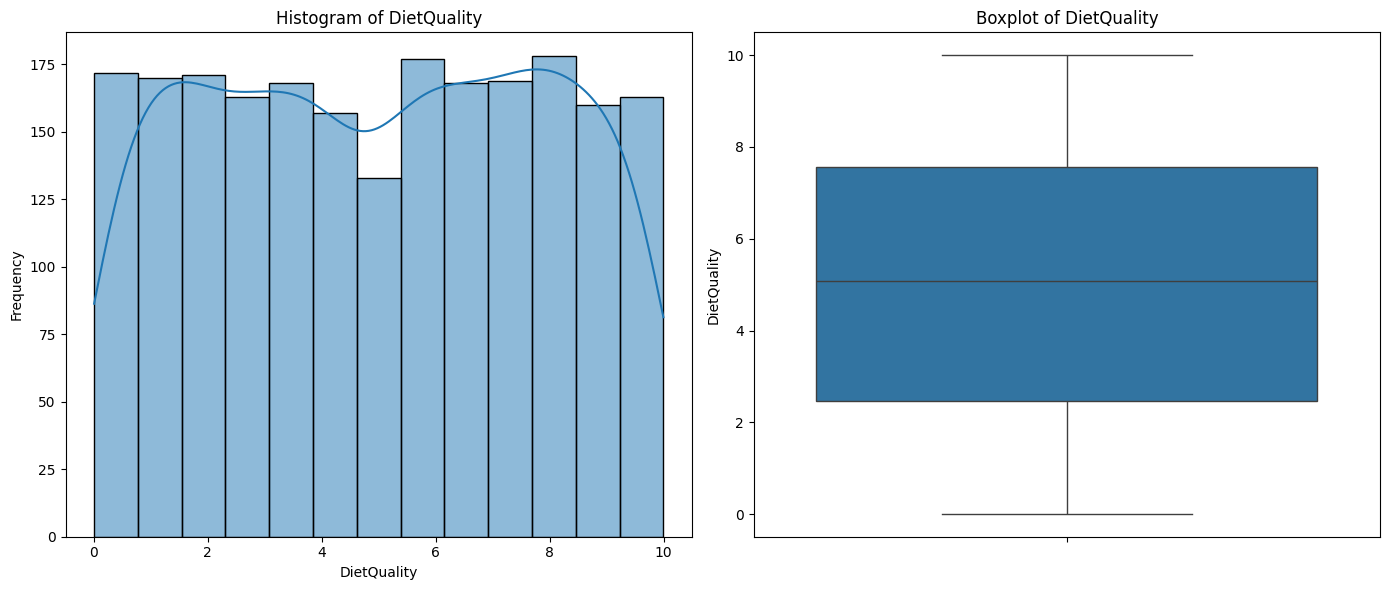

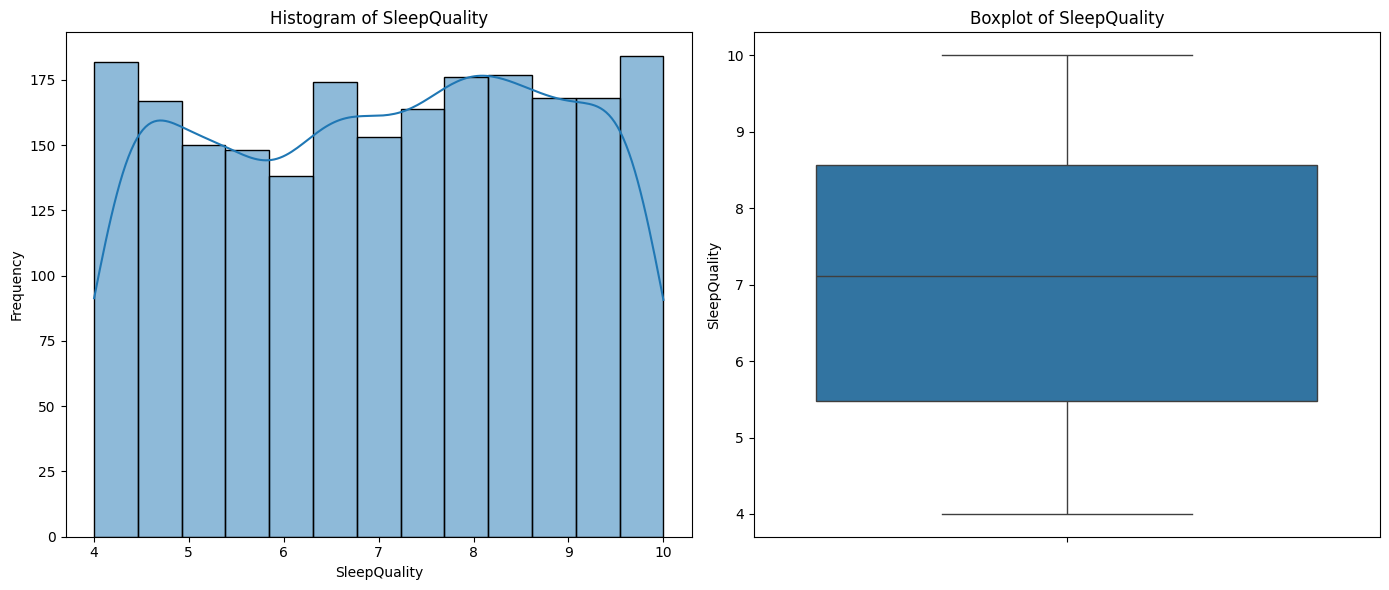

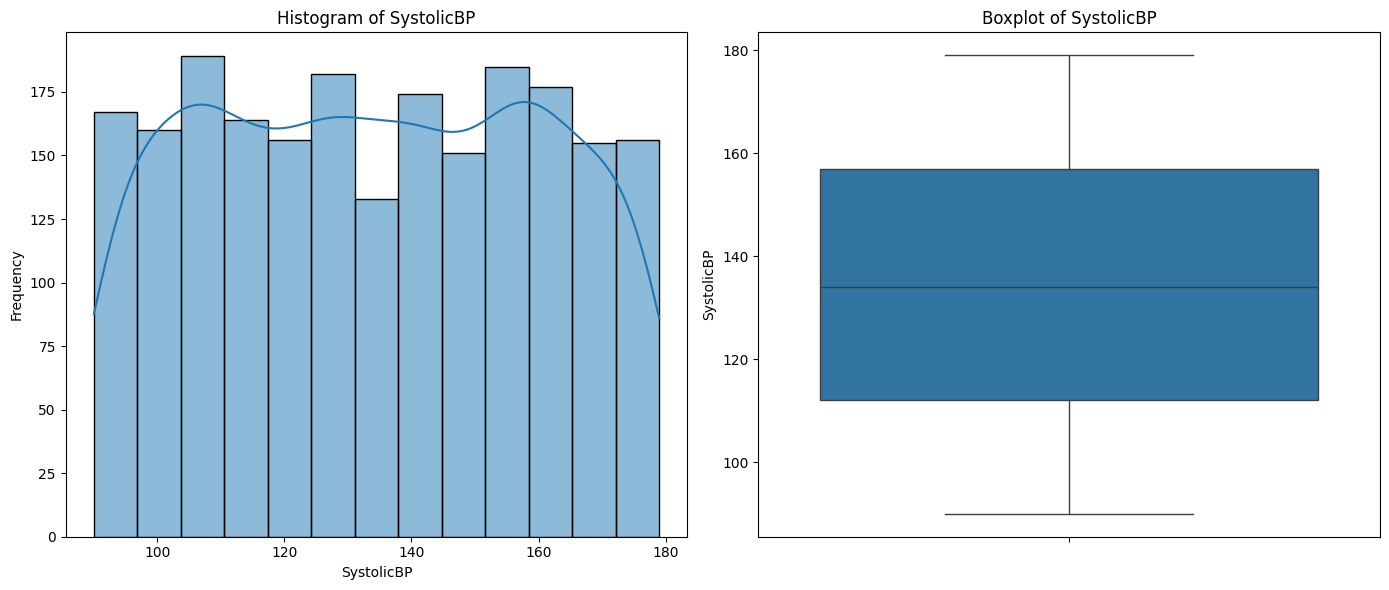

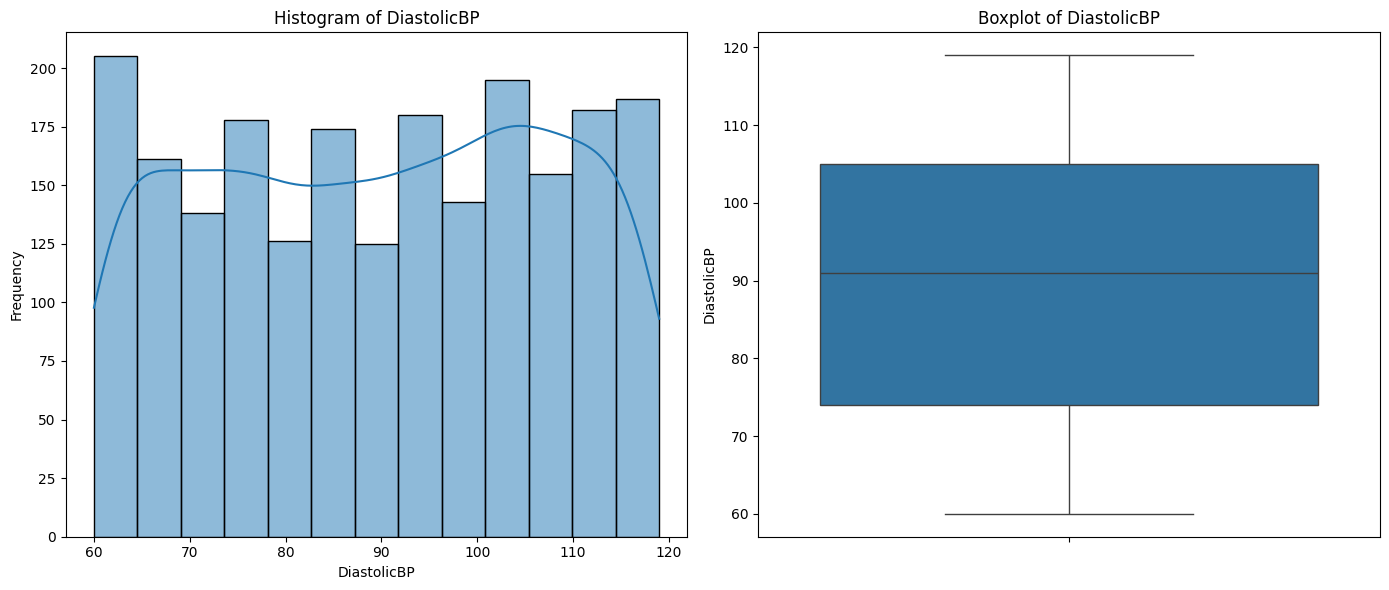

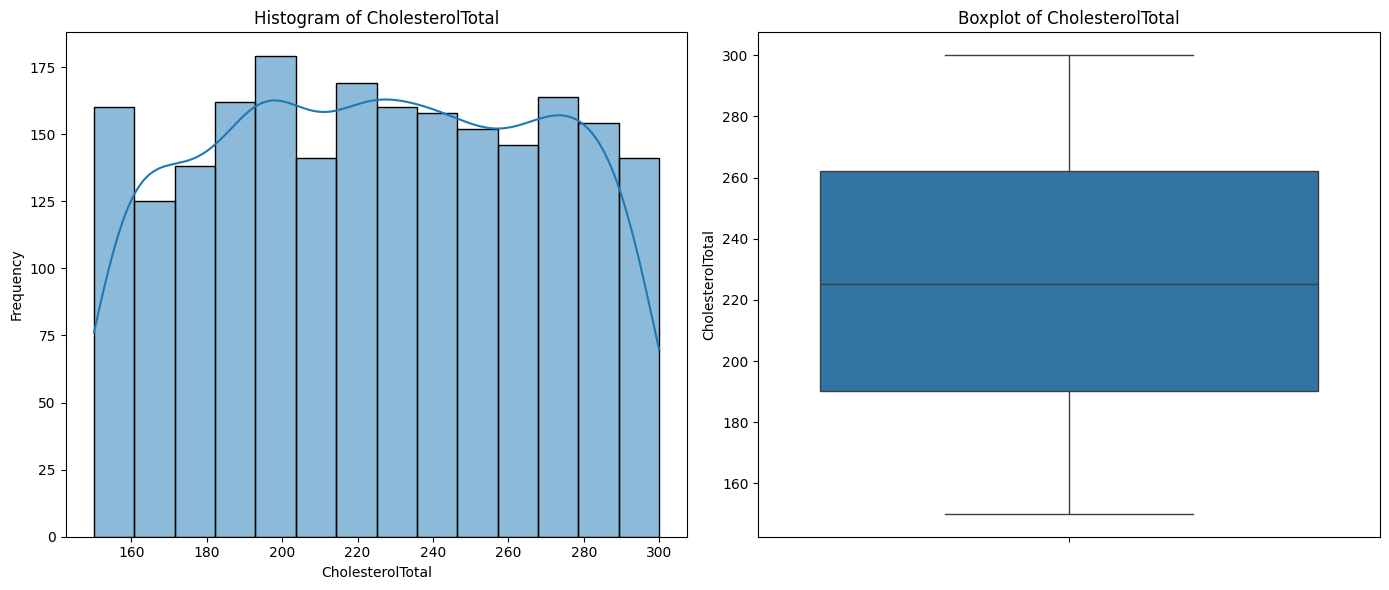

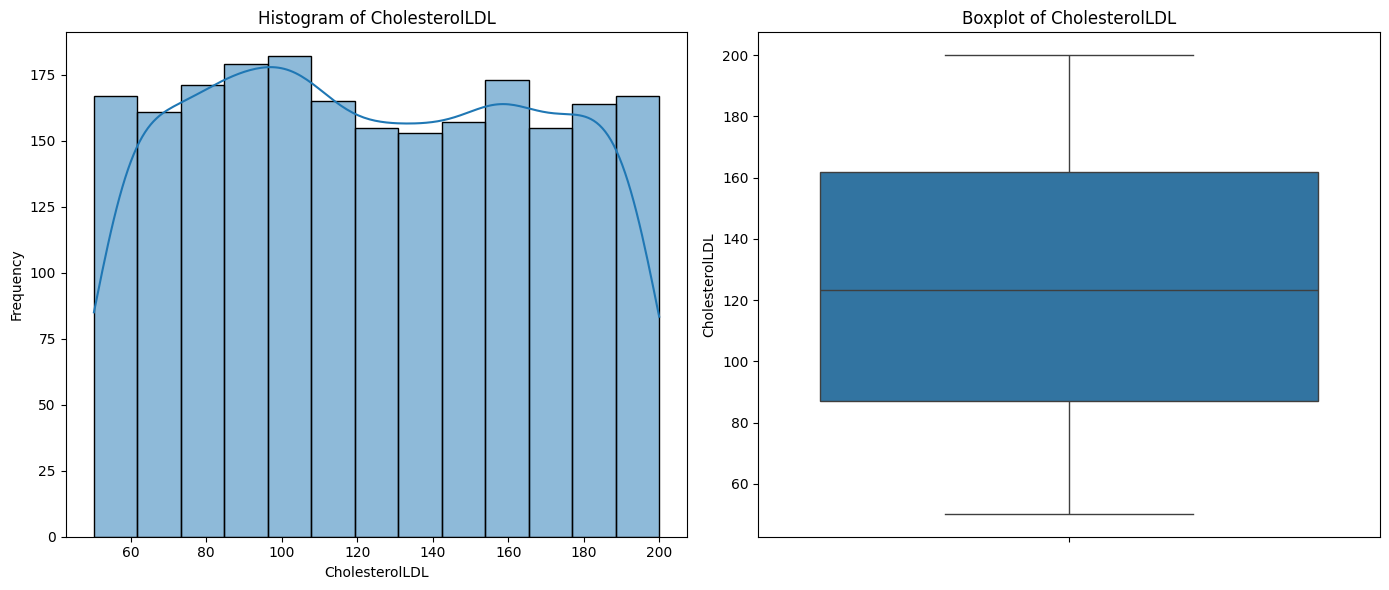

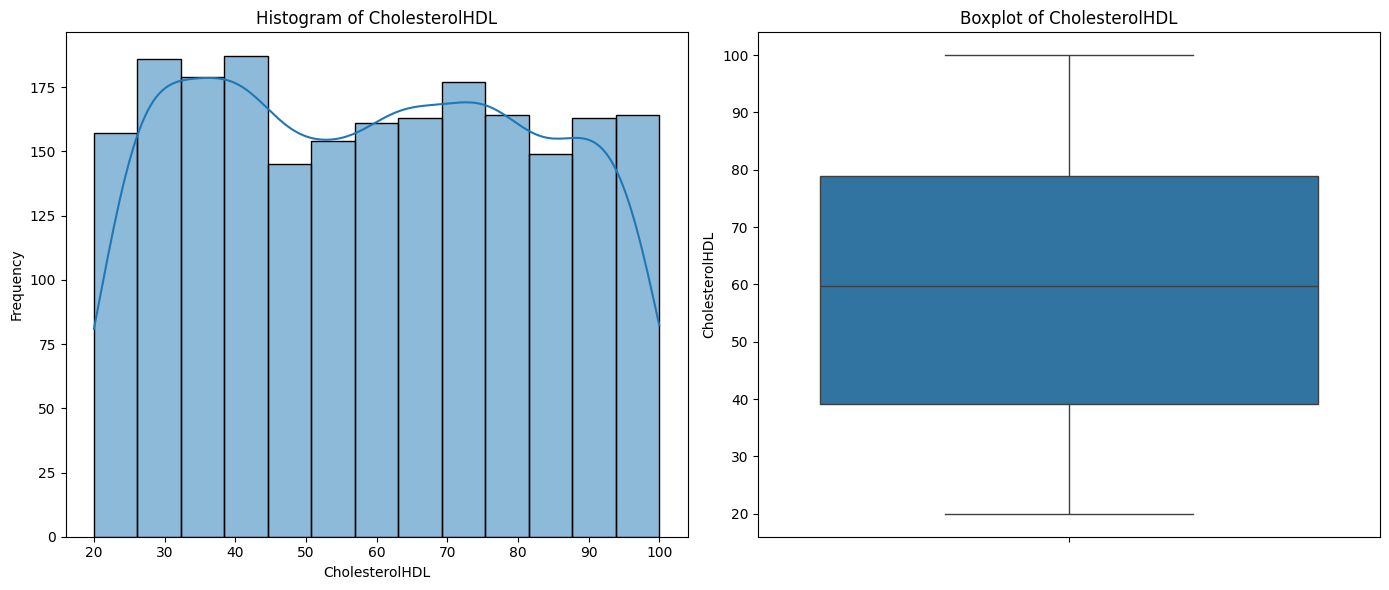

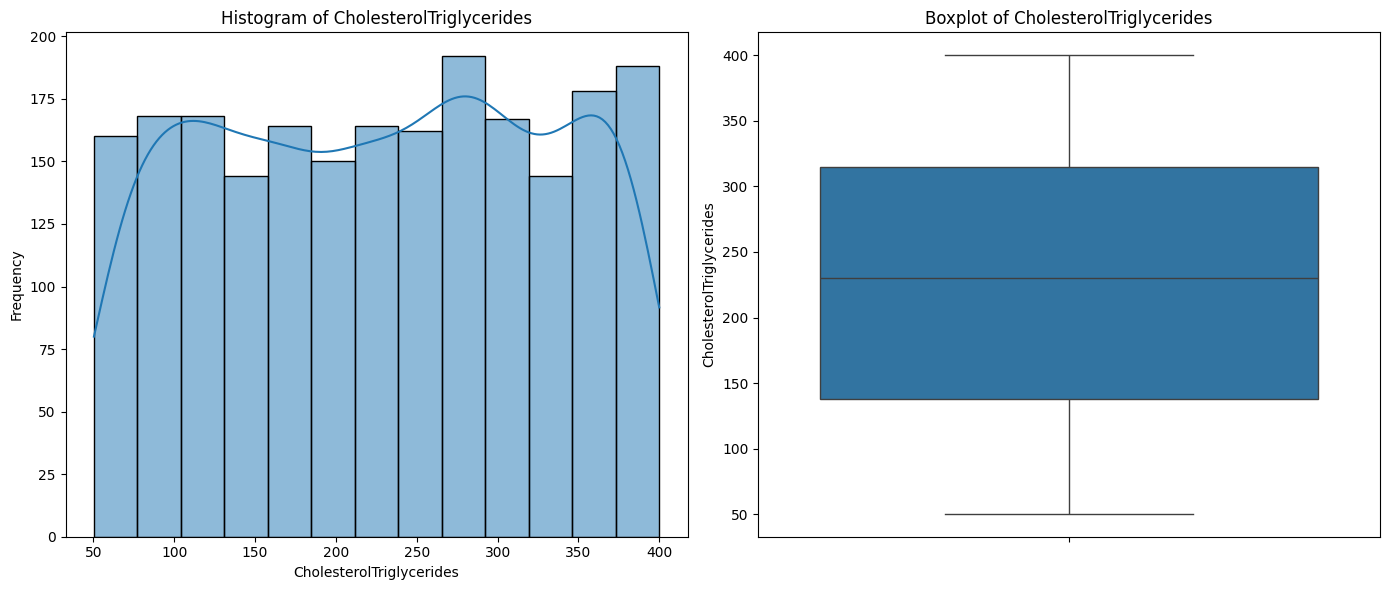

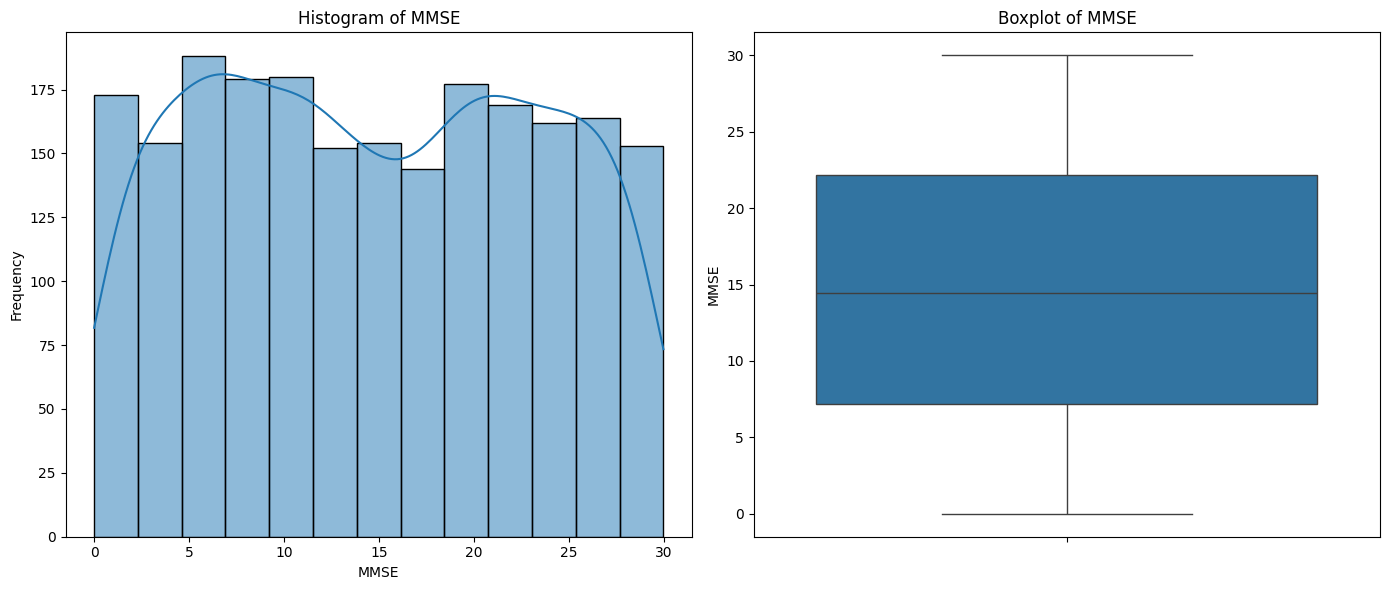

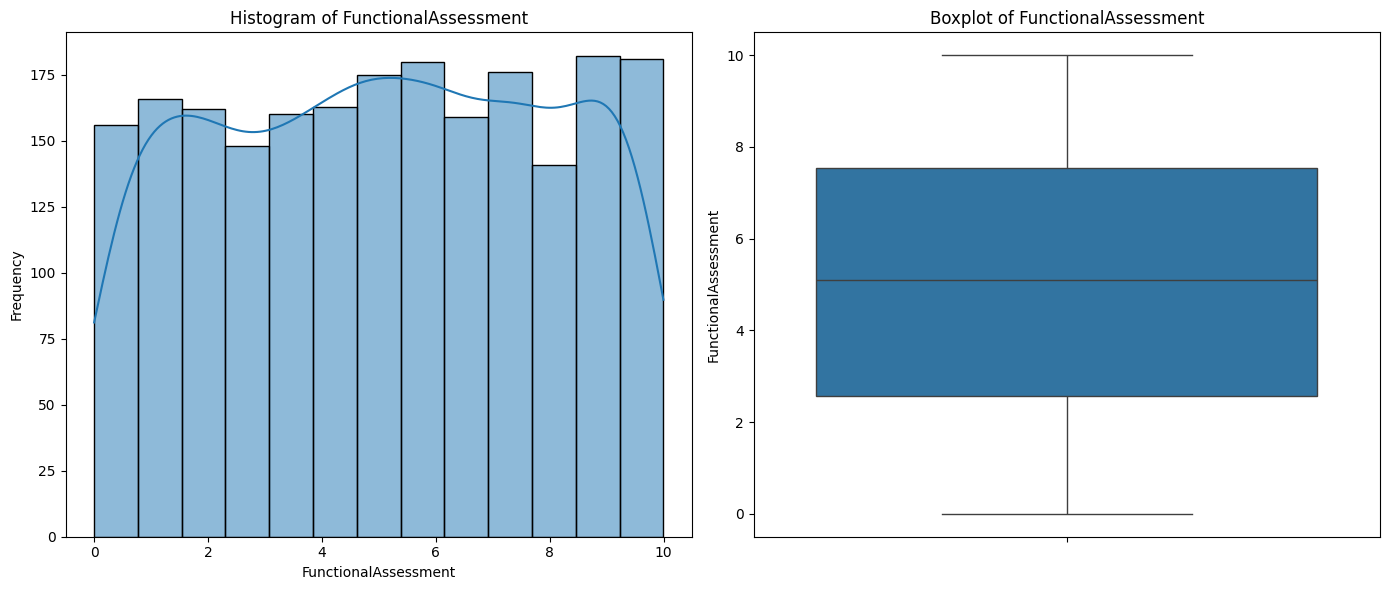

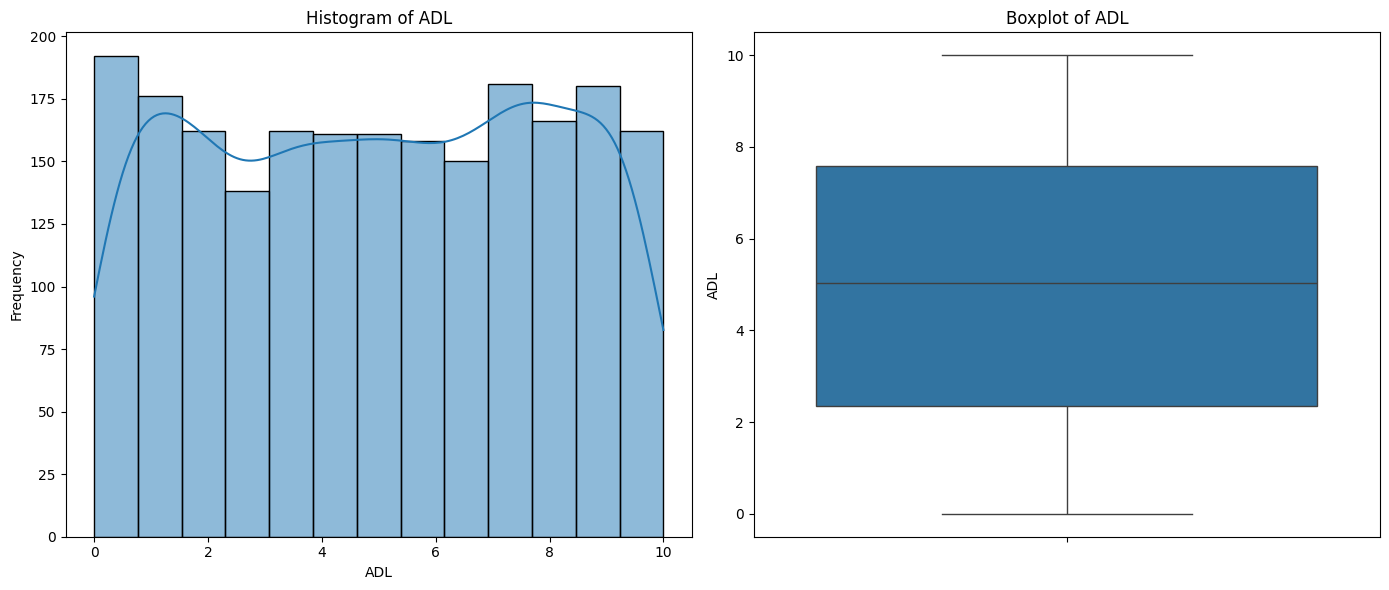

In [17]:
for x in numerical_cols:
    plot_hist_and_box(df,x)

In [18]:
corr_matrix = df.corr()
filtered_corr = corr_matrix[(corr_matrix > 0.1) | (corr_matrix < -0.1)]

#get the key feature for diagnose result (|corr| > 0.03)
corr_with_diagnosis = corr_matrix['Diagnosis'].reset_index()
corr_with_diagnosis.columns = ['Feature', 'Correlation']
filtered_corr_with_diagnosis = corr_with_diagnosis[(corr_with_diagnosis['Correlation'] > 0.03) | (corr_with_diagnosis['Correlation'] < -0.03)]
filtered_corr_with_diagnosis = filtered_corr_with_diagnosis[filtered_corr_with_diagnosis['Feature'] != 'Diagnosis']

# Print the filtered correlations
print(filtered_corr_with_diagnosis.sort_values(by='Correlation', ascending=False))

                    Feature  Correlation
24         MemoryComplaints     0.306742
25       BehavioralProblems     0.224350
20           CholesterolHDL     0.042584
15             Hypertension     0.035080
11    CardiovascularDisease     0.031490
12                 Diabetes    -0.031508
19           CholesterolLDL    -0.031976
10  FamilyHistoryAlzheimers    -0.032900
3            EducationLevel    -0.043966
9              SleepQuality    -0.056548
22                     MMSE    -0.237126
26                      ADL    -0.332346
23     FunctionalAssessment    -0.364898


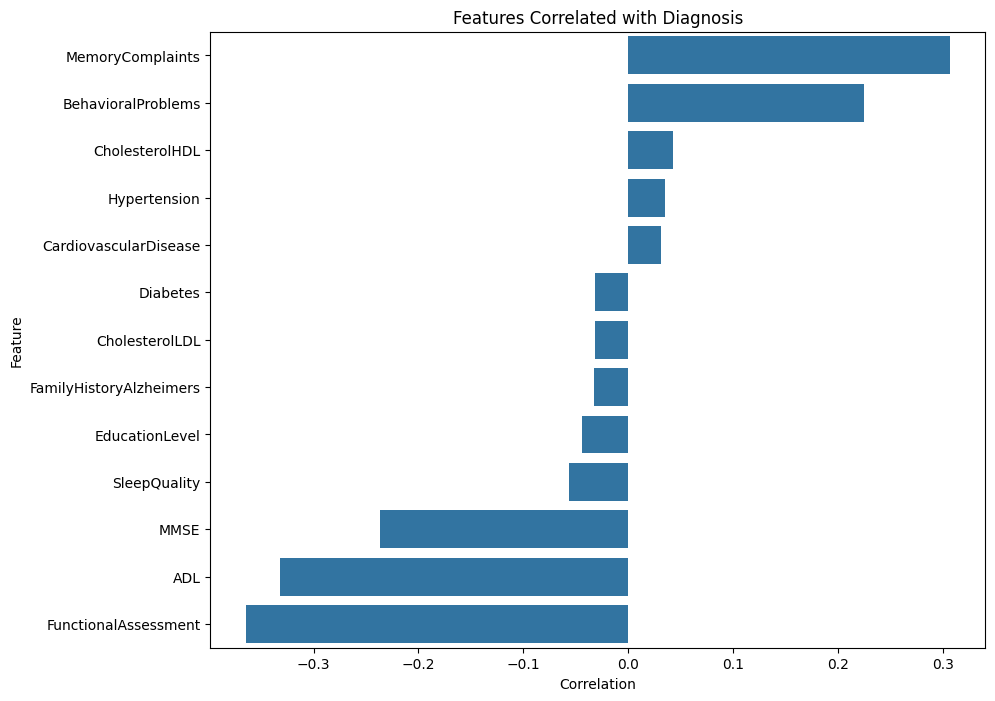

In [19]:
plt.figure(figsize=(10, 8))
sns.barplot(x='Correlation', y='Feature', data=filtered_corr_with_diagnosis.sort_values(by='Correlation', ascending=False))
plt.title('Features Correlated with Diagnosis')
plt.show()

In [20]:
X_feature = filtered_corr_with_diagnosis['Feature'].to_list()
X_feature

['EducationLevel',
 'SleepQuality',
 'FamilyHistoryAlzheimers',
 'CardiovascularDisease',
 'Diabetes',
 'Hypertension',
 'CholesterolLDL',
 'CholesterolHDL',
 'MMSE',
 'FunctionalAssessment',
 'MemoryComplaints',
 'BehavioralProblems',
 'ADL']

In [21]:
num_col=[x for x in X_feature   if x in numerical_cols]
cat_col=[x for x in X_feature   if x in categorical_cols]


In [22]:
num_col

['SleepQuality',
 'CholesterolLDL',
 'CholesterolHDL',
 'MMSE',
 'FunctionalAssessment',
 'ADL']

In [23]:
X_feature

['EducationLevel',
 'SleepQuality',
 'FamilyHistoryAlzheimers',
 'CardiovascularDisease',
 'Diabetes',
 'Hypertension',
 'CholesterolLDL',
 'CholesterolHDL',
 'MMSE',
 'FunctionalAssessment',
 'MemoryComplaints',
 'BehavioralProblems',
 'ADL']

In [24]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier

# Assuming df is your DataFrame and you have defined X_feature and num_col
# Defining the features and the target
X = df[X_feature]
y = df['Diagnosis']

# Train-Test-Validation split
# Split the data into training+validation and test sets
X_train1, X_test, y_train1, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
# Split the training+validation set into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train1, y_train1, test_size=0.1, random_state=1)

# Define the numerical transformer (MinMaxScaler)
num_transformer = MinMaxScaler()

# Define the ColumnTransformer to preprocess numerical features
preprocessor = ColumnTransformer([
    ('num_col', num_transformer, num_col)
])

classification_models = {
    "Logistic Regression": LogisticRegression(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Support Vector Machine": SVC(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "Gaussian Naive Bayes": GaussianNB(),
    "XGBoost": XGBClassifier()
}

model_names = []
scoring = []

# Train and evaluate each model using the validation set
for name, clf in classification_models.items():
    pipeline = make_pipeline(preprocessor, clf)
    pipeline.fit(X_train, y_train)
    score = pipeline.score(X_test, y_test, scoring='f1')  # Using f1
    model_names.append(name)
    scoring.append(score)
    print(f"{name} accuracy: {score:.2f}")


Logistic Regression accuracy: 0.78
K-Nearest Neighbors accuracy: 0.79
Support Vector Machine accuracy: 0.82
Decision Tree accuracy: 0.76
Random Forest accuracy: 0.84
Gradient Boosting accuracy: 0.84
AdaBoost accuracy: 0.79
Gaussian Naive Bayes accuracy: 0.79
XGBoost accuracy: 0.80


/Users/iliyask/.pyenv/versions/3.10.6/envs/alzheimer_disease/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


In [63]:
#unbalanced dataset
y.value_counts(normalize=True)

0       0
1       0
2       0
3       0
4       0
       ..
2144    1
2145    1
2146    1
2147    1
2148    0
Name: Diagnosis, Length: 2149, dtype: int64

In [26]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

# Create a pipeline with the preprocessor and the Gradient Boosting model
gb_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', GradientBoostingClassifier(random_state=1))
])

# Define the parameter grid for Gradient Boosting
param_grid = {
    'classifier__n_estimators': [100, 200, 300],
    'classifier__learning_rate': [0.01, 0.05, 0.02, 0.03, 0.07, 0.1, 0.2, 0.3],
    'classifier__max_depth': [3, 5, 7,8],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4]
}

# Create the GridSearchCV object
grid_search = GridSearchCV(
    estimator=gb_pipeline,
    param_grid=param_grid,
    cv=5,
    n_jobs=-1,
    verbose=2,
    scoring='precision'  # Change scoring to accuracy for classification
)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Print the best parameters and score
print("Best parameters:", grid_search.best_params_)
print("Best accuracy:", grid_search.best_score_)

# Get the best model
best_model = grid_search.best_estimator_

# Evaluate the best model on the validation set
val_score = best_model.score(X_val, y_val)
print("Accuracy on validation set:", val_score)

# Make predictions on the test set
y_pred = best_model.predict(X_test)

# Generate and print the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Fitting 5 folds for each of 864 candidates, totalling 4320 fits
[CV] END classifier__learning_rate=0.01, classifier__max_depth=3, classifier__min_samples_leaf=1, classifier__min_samples_split=2, classifier__n_estimators=100; total time=   0.3s
[CV] END classifier__learning_rate=0.01, classifier__max_depth=3, classifier__min_samples_leaf=1, classifier__min_samples_split=2, classifier__n_estimators=100; total time=   0.3s
[CV] END classifier__learning_rate=0.01, classifier__max_depth=3, classifier__min_samples_leaf=1, classifier__min_samples_split=2, classifier__n_estimators=100; total time=   0.3s
[CV] END classifier__learning_rate=0.01, classifier__max_depth=3, classifier__min_samples_leaf=1, classifier__min_samples_split=2, classifier__n_estimators=100; total time=   0.3s
[CV] END classifier__learning_rate=0.01, classifier__max_depth=3, classifier__min_samples_leaf=1, classifier__min_samples_split=2, classifier__n_estimators=100; total time=   0.3s
[CV] END classifier__learning_rate=0

KeyboardInterrupt: 

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.99      0.89       277
           1       0.97      0.59      0.73       153

    accuracy                           0.85       430
   macro avg       0.89      0.79      0.81       430
weighted avg       0.87      0.85      0.84       430



In [ ]:
from sklearn.inspection import permutation_importance

# Perform the permutation
permutation_score = permutation_importance(best_model, X_train, y_train, n_repeats=10)

# Unstack results showing the decrease in performance after shuffling features
importance_df = pd.DataFrame(np.vstack((X_train.columns,
                                        permutation_score.importances_mean)).T)
importance_df.columns=['feature','score decrease']

# Show the important features
print(importance_df.sort_values(by="score decrease", ascending = False))

                    feature score decrease
9      FunctionalAssessment       0.139108
12                      ADL       0.121784
8                      MMSE       0.078087
0            EducationLevel            0.0
1              SleepQuality            0.0
2   FamilyHistoryAlzheimers            0.0
3     CardiovascularDisease            0.0
4                  Diabetes            0.0
5              Hypertension            0.0
6            CholesterolLDL            0.0
7            CholesterolHDL            0.0
10         MemoryComplaints            0.0
11       BehavioralProblems            0.0


Let's reduce our independent  values to 3

In [81]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline

# Assuming df is your DataFrame
# Defining the features and the target
X = df[['ADL','MMSE','FunctionalAssessment']]
y = df['Diagnosis']

# Train-Test-Validation split

# Train-Test-Validation split
# Split the data into training+validation and test sets
X_train1, X_test, y_train1, y_test = train_test_split(X, y, test_size=0.1, random_state=1)
# Split the training+validation set into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train1, y_train1, test_size=0.1, random_state=1)

# Define the numerical transformer (MinMaxScaler)
num_transformer = MinMaxScaler()

# Define the ColumnTransformer to preprocess numerical features
preprocessor = ColumnTransformer([
    ('num', num_transformer, ['ADL','MMSE','FunctionalAssessment'])
])

classification_models = {
    "Logistic Regression": LogisticRegression(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Support Vector Machine": SVC(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "Gaussian Naive Bayes": GaussianNB(),
    "XGBoost": XGBClassifier()
}

model_names = []
f1_scores = []

# Train and evaluate each model using the validation set
for name, clf in classification_models.items():
    pipeline = ImbPipeline([
        ('preprocessor', preprocessor),
        ('smote', SMOTE(random_state=42)),
        ('classifier', clf)
    ])
    pipeline.fit(X_train, y_train)
    score = pipeline.score(X_test, y_test, scoring='f1')  # Using f1
    model_names.append(name)
    f1_scores.append(score)
    print(f"{name} accuracy: {score:.2f}")


Logistic Regression accuracy: 0.76
K-Nearest Neighbors accuracy: 0.79
Support Vector Machine accuracy: 0.78
Decision Tree accuracy: 0.77
Random Forest accuracy: 0.81
Gradient Boosting accuracy: 0.80
AdaBoost accuracy: 0.75
Gaussian Naive Bayes accuracy: 0.78
XGBoost accuracy: 0.78


/Users/iliyask/.pyenv/versions/3.10.6/envs/alzheimer_disease/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


In [82]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report, f1_score
from sklearn.ensemble import RandomForestClassifier
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE
from scipy.stats import randint

# Create a pipeline with the preprocessor, SMOTE, and the Random Forest model
rf_pipeline = ImbPipeline([
    ('preprocessor', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Define a simpler parameter distribution for Random Forest
params = {
    'classifier__n_estimators': [100, 200, 300],
    'classifier__max_depth': [5, 10, None],
    'classifier__min_samples_split': [2, 5],
    'classifier__min_samples_leaf': [1, 2],
    'classifier__max_features': ['sqrt', 'log2']
}

# Create the RandomizedSearchCV object
random_search = RandomizedSearchCV(
    estimator=rf_pipeline,
    param_distributions=params,
    n_iter=100,  # Reduced number of iterations due to smaller parameter space
    cv=5,
    n_jobs=-1,
    verbose=2,
    scoring='f1',  # Use F1 score for binary classification
    random_state=42
)

# Fit the random search to the data
random_search.fit(X_train, y_train)

# Print the best parameters and score
print("Best parameters:", random_search.best_params_)
print("Best F1 score:", random_search.best_score_)

# Get the best model
best_model = random_search.best_estimator_

# Evaluate the best model on the test set
y_pred = best_model.predict(X_test)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Calculate and print the F1 score on the test set
f1 = f1_score(y_test, y_pred, average='binary')
print(f"\nF1 Score on Test Set: {f1:.4f}")


/Users/iliyask/.pyenv/versions/3.10.6/envs/alzheimer_disease/lib/python3.10/site-packages/sklearn/model_selection/_search.py:320: UserWarning: The total space of parameters 72 is smaller than n_iter=100. Running 72 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 5 folds for each of 72 candidates, totalling 360 fits
[CV] END classifier__max_depth=5, classifier__max_features=sqrt, classifier__min_samples_leaf=1, classifier__min_samples_split=2, classifier__n_estimators=100; total time=   0.2s
[CV] END classifier__max_depth=5, classifier__max_features=sqrt, classifier__min_samples_leaf=1, classifier__min_samples_split=2, classifier__n_estimators=100; total time=   0.2s
[CV] END classifier__max_depth=5, classifier__max_features=sqrt, classifier__min_samples_leaf=1, classifier__min_samples_split=2, classifier__n_estimators=100; total time=   0.2s
[CV] END classifier__max_depth=5, classifier__max_features=sqrt, classifier__min_samples_leaf=1, classifier__min_samples_split=2, classifier__n_estimators=100; total time=   0.2s
[CV] END classifier__max_depth=5, classifier__max_features=sqrt, classifier__min_samples_leaf=1, classifier__min_samples_split=2, classifier__n_estimators=100; total time=   0.2s
[CV] END classifier__max_depth=5, classifie

KeyboardInterrupt: 

In [80]:
# Evaluate the best model on the validation set
val_score = best_model.score(X_val, y_val, scoring='f1')
print("Accuracy on validation set:", val_score)

# Make predictions on the test set
y_pred = best_model.predict(X_test)

# Generate and print the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy on validation set: 0.7474226804123711
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.80      0.82       140
           1       0.66      0.72      0.69        75

    accuracy                           0.77       215
   macro avg       0.75      0.76      0.75       215
weighted avg       0.78      0.77      0.77       215

